<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Análise Exploratória de Dados de Logística II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Manipulação;</li>
  <li>Visualização;</li>
  <li>Storytelling.</li>
</ol>


---

# **Exercícios**

Este *notebook* deve servir como um guia para **você continuar** a construção da sua própria análise exploratória de dados. Fique a vontate para copiar os códigos da aula mas busque explorar os dados ao máximo. Por fim, publique seu *notebook* no [Kaggle](https://www.kaggle.com/).

---

# **Análise Exploratória de Dados de Logística**

## 1\. Contexto

Escreva uma breve descrição do problema.

## 2\. Pacotes e bibliotecas

In [1]:
# importe todas as suas bibliotecas aqui, siga os padrões do PEP8:
#
# - 1º pacotes nativos do python: json, os, etc.;
# - 2º pacotes de terceiros: pandas, seabornm etc.;
# - 3º pacotes que você desenvolveu.
#
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

## 3\. Exploração de dados

In [2]:
# faça o código de exploração de dados:
#
# - coleta de dados;
# - wrangling da estrutura;
# - exploração do schema;
# - etc.

# Abre o arquivo 'deliveries.json' para leitura ('r') em modo de codificação 'utf8'
with open('deliveries.json', mode='r', encoding='utf8') as file:
    # Carrega o conteúdo do arquivo JSON para a variável 'data'
    data = json.load(file)

# Cria um DataFrame do Pandas a partir dos dados carregados do arquivo JSON
df = pd.DataFrame(data)
df.head()

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [3]:
#Usa a função _normalize para separar a latitude e longitude em um novo DF
hub_origin_df = pd.json_normalize(df["origin"])
hub_origin_df.head()

,lng,lat
0,-48.054989,-15.838145
1,-48.054989,-15.838145
2,-48.054989,-15.838145
3,-47.893662,-15.805118
4,-48.054989,-15.838145


In [4]:
#Utiliza o merge para juntar o DF origianl com o o da localização de latitude e longitude
deliveries_df = pd.merge(left=df, right=hub_origin_df, how='inner', left_index=True, right_index=True)
deliveries_df.head()

,name,region,origin,vehicle_capacity,deliveries,lng,lat
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p...",-48.054989,-15.838145
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po...",-48.054989,-15.838145
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p...",-48.054989,-15.838145
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p...",-47.893662,-15.805118
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p...",-48.054989,-15.838145


In [5]:
# Remove colunas desnecessárias do DF e depois renomeia as colunas
deliveries_df = deliveries_df.drop("origin", axis=1)
df = deliveries_df[["name", "region", "lng", "lat", "vehicle_capacity", "deliveries"]]
df.head()

,name,region,lng,lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [6]:
df.rename(columns={"lng": "hub_lng", "lat": "hub_lat"}, inplace=True)
df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [7]:
deliveries_exploded_df = df[["deliveries"]].explode("deliveries")
deliveries_exploded_df.head()

,deliveries
0,"{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'po..."
0,"{'id': '320c94b17aa685c939b3f3244c3099de', 'po..."
0,"{'id': '3663b42f4b8decb33059febaba46d5c8', 'po..."
0,"{'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'poi..."
0,"{'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'po..."


In [8]:
# Essa identação para concatenar três DataFrames criados acima ao longo do eixo das colunas (axis=1) para formar um único DataFrame
deliveries_normalized_df = pd.concat([
  # Extrai o tamanho de cada entrega (size) da lista "deliveries" e renomeia a coluna para "delivery_size"
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["size"])).rename(columns={"deliveries": "delivery_size"}),
  # Extrai a longitude de cada entrega (lng) da lista "deliveries" e renomeia a coluna para "delivery_lng"
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lng"])).rename(columns={"deliveries": "delivery_lng"}),
  # Extrai a latitude de cada entrega (lat) da lista "deliveries" e renomeia a coluna para "delivery_lat"
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lat"])).rename(columns={"deliveries": "delivery_lat"}),
], axis= 1)
# Exibe as primeiras linhas do DataFrame resultante
deliveries_normalized_df.head()

,delivery_size,delivery_lng,delivery_lat
0,9,-48.116189,-15.848929
0,2,-48.118195,-15.850772
0,1,-48.112483,-15.847871
0,2,-48.118023,-15.846471
0,7,-48.114898,-15.858055


In [9]:
len(deliveries_exploded_df)

636149

In [10]:
len(df)

199

In [11]:
df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [12]:
df = df.drop("deliveries", axis=1)
df = pd.merge(left=df, right=deliveries_normalized_df, how='right', left_index=True, right_index=True)
df.reset_index(inplace=True, drop=True)
df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055


In [13]:
len(df)

636149

Vamos agora ver se conseguimos localizar essas coordenadas no mapa

In [14]:
hub_df = df[['region', 'hub_lng', 'hub_lat']]
hub_df =  hub_df.drop_duplicates().sort_values(by='region').reset_index(drop=True)
hub_df.head()

,region,hub_lng,hub_lat
0,df-0,-47.802665,-15.657014
1,df-1,-47.893662,-15.805118
2,df-2,-48.054989,-15.838145


In [15]:
import geopy
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='ebac_student')# objeto de identificação para o Nominatim
location = geolocator.reverse('-15.637013854445248, -47.802664728268745')# aqui apenas para teste foi passado a localização manualmente
print(json.dumps(location.raw, indent=2, ensure_ascii=False))

{
  "place_id": 13128334,
  "licence": "Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright",
  "osm_type": "way",
  "osm_id": 676146967,
  "lat": "-15.636959053673667",
  "lon": "-47.80292173695066",
  "class": "highway",
  "type": "tertiary",
  "place_rank": 26,
  "importance": 0.10000999999999993,
  "addresstype": "road",
  "name": "DF-325",
  "display_name": "DF-325, Sobradinho, Região Geográfica Imediata do Distrito Federal, Região Integrada de Desenvolvimento do Distrito Federal e Entorno, Região Geográfica Intermediária do Distrito Federal, Distrito Federal, Região Centro-Oeste, 73006-605, Brasil",
  "address": {
    "road": "DF-325",
    "suburb": "Sobradinho",
    "town": "Sobradinho",
    "municipality": "Região Geográfica Imediata do Distrito Federal",
    "county": "Região Integrada de Desenvolvimento do Distrito Federal e Entorno",
    "state_district": "Região Geográfica Intermediária do Distrito Federal",
    "state": "Distrito Federal",
    "ISO3166-2-

In [16]:
from geopy.extra.rate_limiter import RateLimiter
#apos a importação do ratelimiter, a gnt instancia ele e passa o parametro que o pacote do geocder aceita: pesquisas de 1 segundo
geocoder = RateLimiter(geolocator.reverse, min_delay_seconds=1)

In [17]:
hub_df['coordinators'] = hub_df['hub_lat'].astype(str) + ", " + hub_df['hub_lng'].astype(str)
hub_df['geodata'] = hub_df['coordinators'].apply(geocoder)
hub_df.head()

,region,hub_lng,hub_lat,coordinators,geodata
0,df-0,-47.802665,-15.657014,"-15.657013854445248, -47.802664728268745","(Rua 7, Quadra 2, Sobradinho, Região Geográfic..."
1,df-1,-47.893662,-15.805118,"-15.80511751066334, -47.89366206897872","(SQS 303, Asa Sul, Brasília, Plano Piloto, Reg..."
2,df-2,-48.054989,-15.838145,"-15.83814451122274, -48.05498915846707","(Armazém do Bolo, lote 4/8, CSB 4/5, Taguating..."


In [18]:
hub_geodata_df = pd.json_normalize(hub_df['geodata'].apply(lambda data: data.raw))
hub_geodata_df

,place_id,licence,osm_type,osm_id,lat,lon,class,type,place_rank,importance,...,address.state,address.ISO3166-2-lvl4,address.region,address.postcode,address.country,address.country_code,address.neighbourhood,address.city,address.shop,address.house_number
0,13551965,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,240210480,-15.656916027876347,-47.80264463632131,highway,secondary,26,0.10001,...,Distrito Federal,BR-DF,Região Centro-Oeste,73015-202,Brasil,br,NaN,NaN,NaN,NaN
1,13548034,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,66353368,-15.805172757199022,-47.893723539491205,highway,residential,26,0.10001,...,Distrito Federal,BR-DF,Região Centro-Oeste,70342-010,Brasil,br,SQS 303,Brasília,NaN,NaN
2,10766946,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,6249717596,-15.8384371,-48.0552917,shop,pastry,30,0.00001,...,Distrito Federal,BR-DF,Região Centro-Oeste,72015-030,Brasil,br,NaN,Taguatinga,Armazém do Bolo,lote 4/8


In [19]:
hub_geodata_df = hub_geodata_df[["address.town", "address.suburb", "address.city"]] #selecionando as colunas de interesse
hub_geodata_df.rename(columns={"address.town": "hub_town", "address.suburb": "hub_suburb", "address.city": "hub_city"}, inplace=True)# renomeando para melhorar o entendimento
hub_geodata_df["hub_city"] = np.where(hub_geodata_df["hub_city"].notna(), hub_geodata_df["hub_city"], hub_geodata_df["hub_town"]) # processando as colunas de interesse
hub_geodata_df["hub_suburb"] = np.where(hub_geodata_df["hub_suburb"].notna(), hub_geodata_df["hub_suburb"], hub_geodata_df["hub_city"])
hub_geodata_df = hub_geodata_df.drop("hub_town", axis=1)
hub_geodata_df.head()

C:\Users\Leão Neto\AppData\Local\Temp\ipykernel_22764\3617667334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub_geodata_df.rename(columns={"address.town": "hub_town", "address.suburb": "hub_suburb", "address.city": "hub_city"}, inplace=True)# renomeando para melhorar o entendimento
C:\Users\Leão Neto\AppData\Local\Temp\ipykernel_22764\3617667334.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub_geodata_df["hub_city"] = np.where(hub_geodata_df["hub_city"].notna(), hub_geodata_df["hub_city"], hub_geodata_df["hub_town"]) # processando as colunas de in

,hub_suburb,hub_city
0,Sobradinho,Sobradinho
1,Asa Sul,Brasília
2,Taguatinga,Taguatinga


In [20]:
hub_df = pd.merge(left=hub_df, right=hub_geodata_df, left_index=True, right_index=True)
hub_df = hub_df[["region", "hub_suburb", "hub_city"]]
hub_df.head()

,region,hub_suburb,hub_city
0,df-0,Sobradinho,Sobradinho
1,df-1,Asa Sul,Brasília
2,df-2,Taguatinga,Taguatinga


In [21]:
deliveries_df = pd.merge(left=df, right=hub_df, how="inner", on="region")
deliveries_df = deliveries_df[["name", "region", "hub_lng", "hub_lat", "hub_city", "hub_suburb", "vehicle_capacity", "delivery_size", "delivery_lng", "delivery_lat"]]
deliveries_df.head()

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055


In [22]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries-geodata.csv" -O deliveries-geodata.csv 

'wget' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [23]:
deliveries_geodata_df = pd.read_csv("deliveries-geodata.csv")
deliveries_geodata_df.head()

,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,-48.116189,-15.848929,Ceilândia,P Sul
1,-48.118195,-15.850772,Ceilândia,P Sul
2,-48.112483,-15.847871,Ceilândia,P Sul
3,-48.118023,-15.846471,Ceilândia,P Sul
4,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


In [24]:
df = pd.merge(left=deliveries_df, right=deliveries_geodata_df[["delivery_city", "delivery_suburb"]], how="inner", left_index=True, right_index=True)
df.head()

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471,Ceilândia,P Sul
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


## 4\. Manipulação

In [25]:
# faça o código de manipulação de dados:
#
# - enriquecimento;
# - controle de qualidade;
# - etc.

In [26]:
# saber qual a estrutura do df
df.head(1)

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul


In [27]:
#observar quais os objetos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   hub_lng           636149 non-null  float64
 3   hub_lat           636149 non-null  float64
 4   hub_city          636149 non-null  object 
 5   hub_suburb        636149 non-null  object 
 6   vehicle_capacity  636149 non-null  int64  
 7   delivery_size     636149 non-null  int64  
 8   delivery_lng      636149 non-null  float64
 9   delivery_lat      636149 non-null  float64
 10  delivery_city     634447 non-null  object 
 11  delivery_suburb   476264 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 58.2+ MB


In [28]:
#muito embora algumas colunas não façam sentido para essa métrica, é um tipo de informação interessante saber dos quartis
df.describe()

,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
count,636149.000000,636149.000000,636149.0,636149.000000,636149.000000,636149.000000
mean,-47.949902,-15.802359,180.0,5.512111,-47.946087,-15.809492
std,0.091875,0.053463,0.0,2.874557,0.112769,0.082462
min,-48.054989,-15.838145,180.0,1.000000,-48.280779,-16.050028
25%,-48.054989,-15.838145,180.0,3.000000,-48.035911,-15.842795
50%,-47.893662,-15.805118,180.0,6.000000,-47.928967,-15.814033
75%,-47.893662,-15.805118,180.0,8.000000,-47.883394,-15.769516
max,-47.802665,-15.657014,180.0,10.000000,-47.310611,-15.500355


In [29]:
# O include ='O' é capaz de tirar informações dos dados das variáveis categoricas
df.describe(include = 'O')

,name,region,hub_city,hub_suburb,delivery_city,delivery_suburb
count,636149,636149,636149,636149,634447,476264
unique,199,3,3,3,38,167
top,cvrp-1-df-87,df-1,Brasília,Asa Sul,Brasília,Brasília
freq,5636,304708,304708,304708,148983,53795


In [30]:
#veriricar se existem itens nulos na tabela
df.isna().sum() * 100 / len(df)

name                 0.000000
region               0.000000
hub_lng              0.000000
hub_lat              0.000000
hub_city             0.000000
hub_suburb           0.000000
vehicle_capacity     0.000000
delivery_size        0.000000
delivery_lng         0.000000
delivery_lat         0.000000
delivery_city        0.267547
delivery_suburb     25.133263
dtype: float64

O indicado mesmo seria retirar a coluna 'delivery_suburb', mas para incremento de informação, deixarei somente de trabalhar com ela e passarei a fazer a limpexza do 'delivery_city'



In [46]:
df = df.dropna(subset=['delivery_city'])

O desvio padrão é utilizado para analisar a dispersão de um conjunto de dados. Um valor alto indica que o os valores do conjunto de dados tendem a estar distantes da média, ou seja, a distribuição é mais “espalhada”. Se o valor for pequeno os dados tendem a estar mais concentrados em torno da média.

In [47]:
#vamos verificar o desvio padrão agora dos veiculos usados e dos tamanhos das encomendas
qtd = df[['vehicle_capacity']].count()[0]
soma = df[['vehicle_capacity']].sum()[0]
media = soma/qtd
df[['vehicle_capacity']] - media
variancia = (((df[['vehicle_capacity']] - media) ** 2).sum() / qtd)[0]
variancia ** 0.5
desvio_padrao = np.std(df[['vehicle_capacity']].values)
desvio_padrao

0.0

In [48]:
qtd = df[['delivery_size']].count()[0]
soma = df[['delivery_size']].sum()[0]
media = soma/qtd
df[['delivery_size']] - media
variancia = (((df[['delivery_size']] - media) ** 2).sum() / qtd)[0]
variancia ** 0.5
desvio_padrao = np.std(df[['delivery_size']].values)
desvio_padraodesvio_padrao = np.std(df[['delivery_size']].values)
desvio_padrao

2.874400916427391

Podemos afirmar que muito embora haja uma variação entre o tamanho das encomendas, a capacidade do veiculo se permanece concentrada, o que indica que a empresa optou por comprar veiculos com capacidade semelhantes. As razões da compra não são possiveis de se explicar pelos dados presentes. 

In [49]:
# Vamos ver agora qual foi a região que comprou os maiores produtos
dftop = df.groupby('hub_city')['delivery_size'].sum()
dftop.mode()

0     384832
1    1435181
2    1677087
Name: delivery_size, dtype: int64

In [50]:
df['hub_city'].unique()

array(['Taguatinga', 'Brasília', 'Sobradinho'], dtype=object)

In [51]:
#Nem sempre a que comprou os mairoes produtos é a que obteve maior média de lucro ou mesmo de compra
#como não temos o lucro, vamos ver qual a que manteve a maior média de compra
media_compra = df.groupby('hub_city')['delivery_size'].mean()
regiao_media = media_compra.idxmax()
regiao_media

'Brasília'

In [57]:
# Agrupar o DataFrame por região e cidade de entrega, contar o número de ocorrências e selecionar as cinco principais cidades para cada região
top_cinco_regioes = df.groupby('hub_city')['delivery_city'].value_counts().groupby(level=0).nlargest(5)

# Agora você tem as cinco principais regiões de entrega para cada região. Você pode imprimir ou acessar os resultados conforme necessário
print(top_cinco_regioes)


hub_city    hub_city    delivery_city       
Brasília    Brasília    Brasília                65240
                        Taguatinga              22772
                        Sudoeste / Octogonal    19302
                        Ceilândia               18945
                        Águas Claras            18559
Sobradinho  Sobradinho  Brasília                14297
                        Taguatinga               5937
                        Ceilândia                4995
                        Águas Claras             4739
                        Sudoeste / Octogonal     4180
Taguatinga  Taguatinga  Brasília                69446
                        Sudoeste / Octogonal    20733
                        Taguatinga              16855
                        Guará                   14332
                        Ceilândia               14013
Name: count, dtype: int64


## 5\. Visualização

In [52]:
# faça o código de visualização de dados:
#
# - produza pelo menos duas visualizações;
# - adicione um pequeno texto com os insights encontrados;
# - etc.

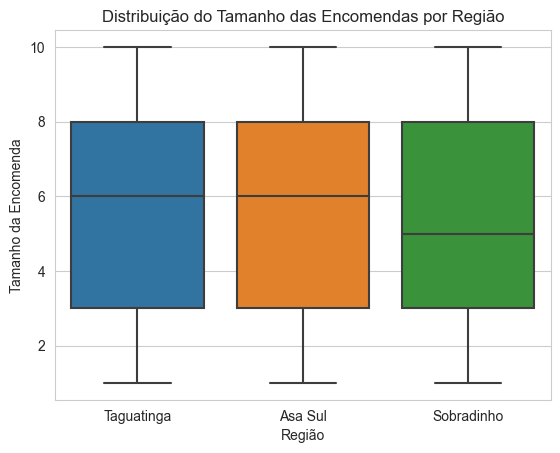

In [53]:
# Filtrar as regiões com tamanhos de encomendas menores que 100 (se necessário)
df = df[df['delivery_size'] < 12]

# Configurar o estilo do gráfico
with sns.axes_style('whitegrid'):
    # Criar o gráfico de distribuição do tamanho das encomendas por região
    grafico = sns.boxplot(data=df, x='hub_suburb', y='delivery_size')
    # Definir título e rótulos dos eixos
    grafico.set(title='Distribuição do Tamanho das Encomendas por Região', xlabel='Região', ylabel='Tamanho da Encomenda')
    # Exibir o gráfico
    plt.show()


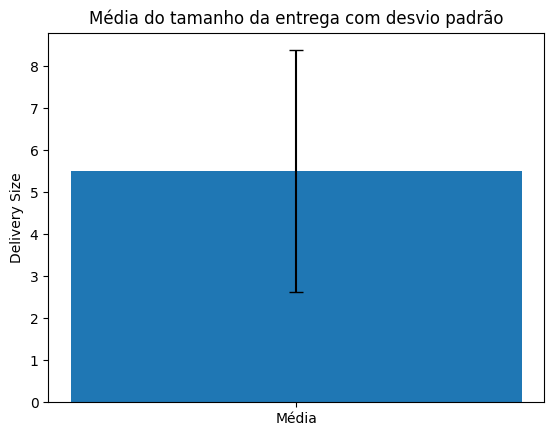

In [54]:
# Calculando a média e o desvio padrão
media = df['delivery_size'].mean()
desvio_padrao = df['delivery_size'].std()

# Criando o gráfico de barras
plt.bar('Média', media, yerr=desvio_padrao, capsize=5)
plt.ylabel('Delivery Size')
plt.title('Média do tamanho da entrega com desvio padrão')
plt.show()


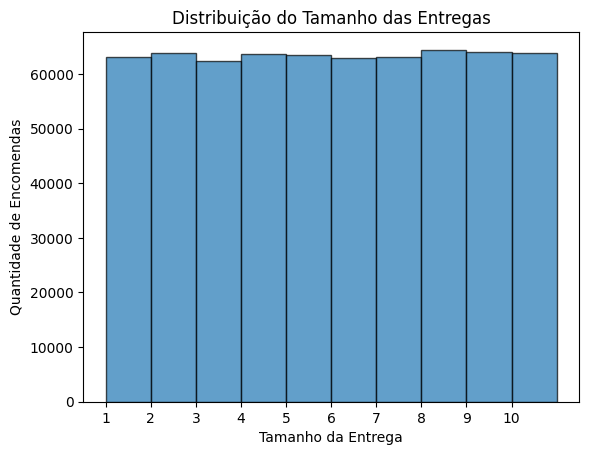

In [55]:
# Criando o histograma
plt.hist(df['delivery_size'], bins=range(1, 12), edgecolor='black', alpha=0.7)

# Adicionando rótulos e título
plt.xlabel('Tamanho da Entrega')
plt.ylabel('Quantidade de Encomendas')
plt.title('Distribuição do Tamanho das Entregas')

# Configurando os ticks do eixo x
plt.xticks(range(1, 11))

# Exibindo o histograma
plt.show()


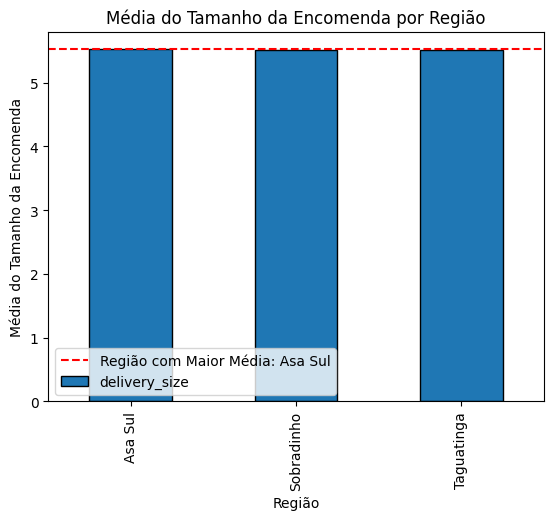

In [56]:
# Calcular a média do tamanho das encomendas por região
media_compra = df.groupby('hub_suburb')['delivery_size'].mean()

# Encontrar a região com a maior média
regiao_media = media_compra.idxmax()

# Criar o gráfico de barras
media_compra.plot(kind='bar', edgecolor='black')

# Adicionar rótulos e título
plt.xlabel('Região')
plt.ylabel('Média do Tamanho da Encomenda')
plt.title('Média do Tamanho da Encomenda por Região')

# Destacar a região com a maior média
plt.axhline(y=media_compra[regiao_media], color='r', linestyle='--', label=f'Região com Maior Média: {regiao_media}')

# Exibir legenda
plt.legend()

# Mostrar o gráfico
plt.show()


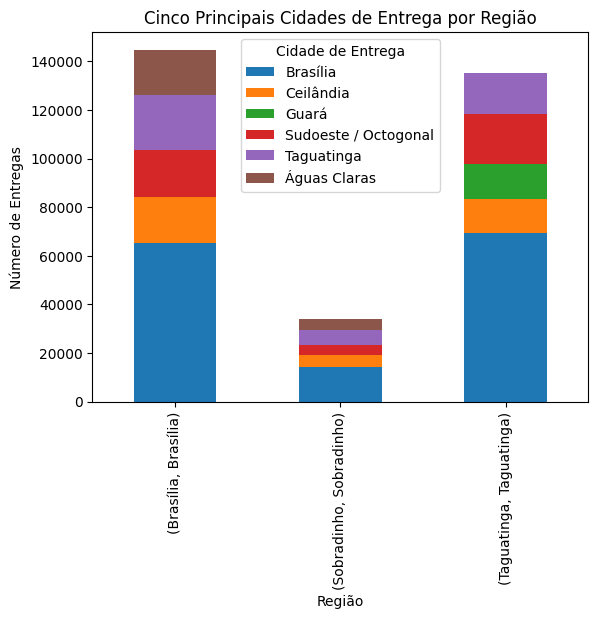

In [59]:
# Criar um gráfico de barras
top_cinco_regioes.unstack().plot(kind='bar', stacked=True)

# Adicionar rótulos e título
plt.xlabel('Região')
plt.ylabel('Número de Entregas')
plt.title('Cinco Principais Cidades de Entrega por Região')

# Exibir legenda
plt.legend(title='Cidade de Entrega')

# Mostrar o gráfico
plt.show()
